<a href="https://colab.research.google.com/github/lee0721/basketball_yolov8/blob/main/evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/gdrive
✅ 找到最新的訓練結果：/content/gdrive/MyDrive/individual_project/proj/basketball_yolov8/runs/train/exp
🔹 最後一個 Epoch(30) 訓練指標:
   - mAP@0.5: 0.8710
   - Precision: 0.8864
   - Recall: 0.8484
✅ 讀取混淆矩陣：


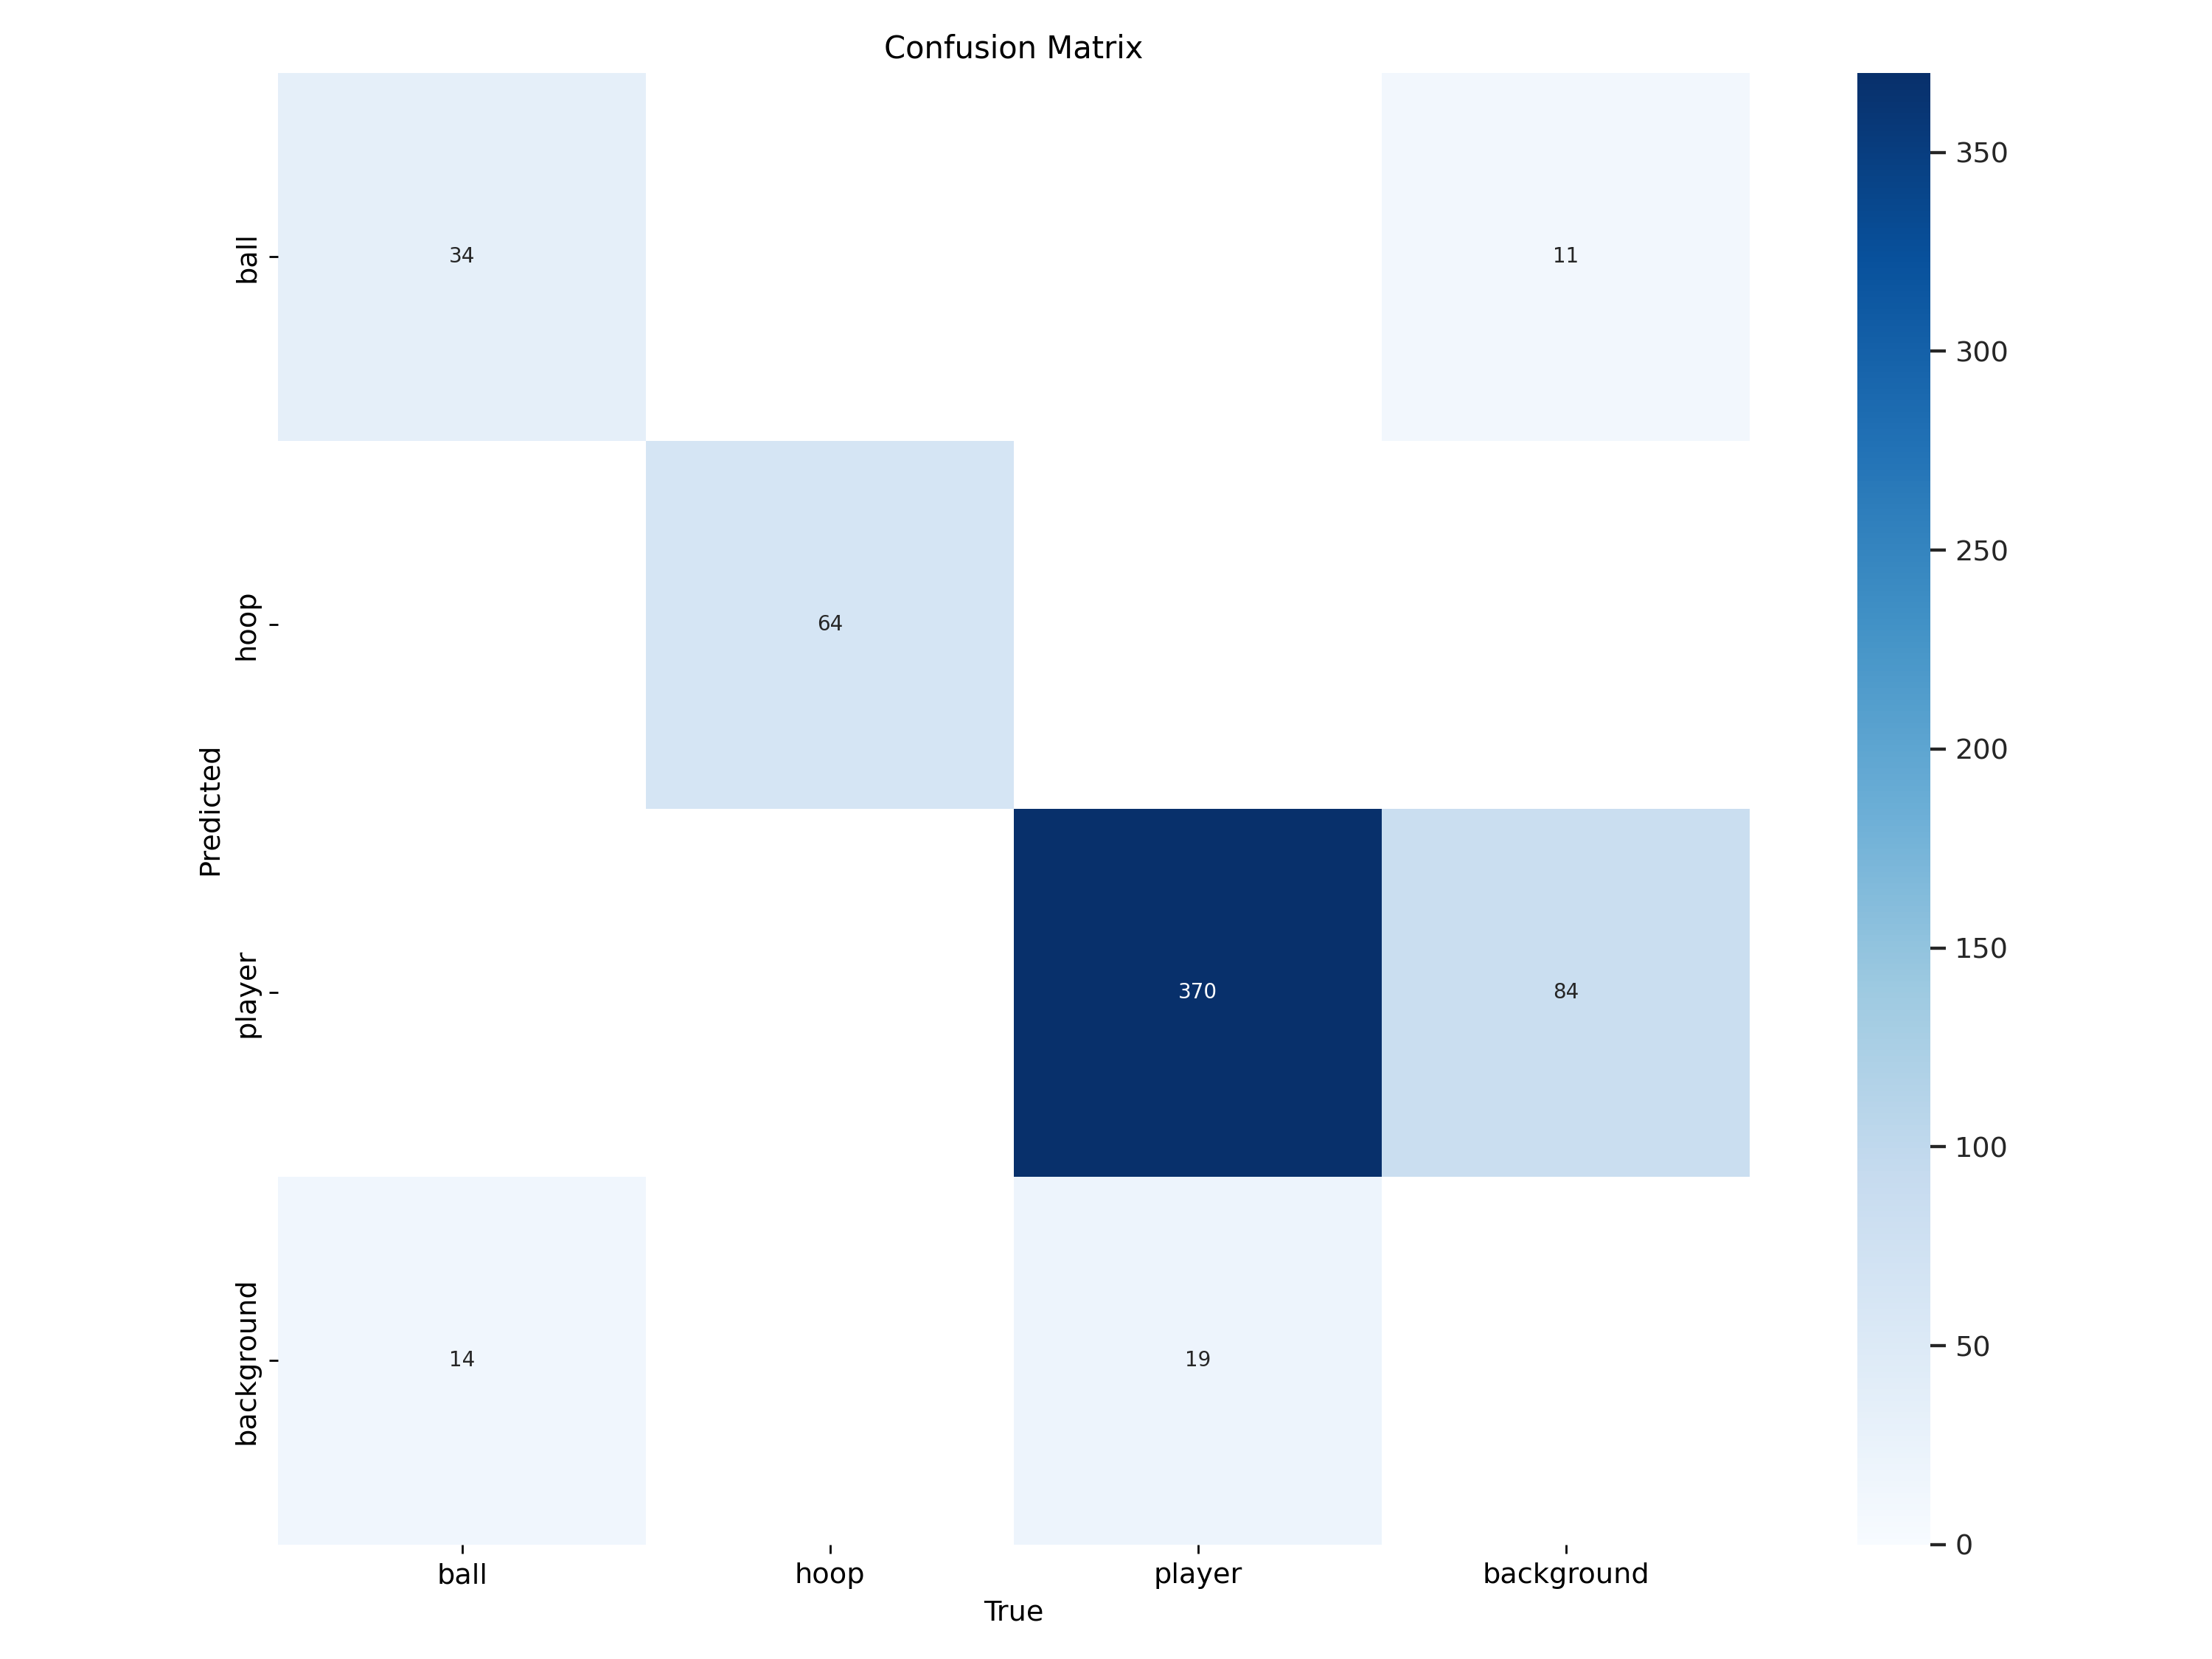

✅ 讀取訓練曲線：


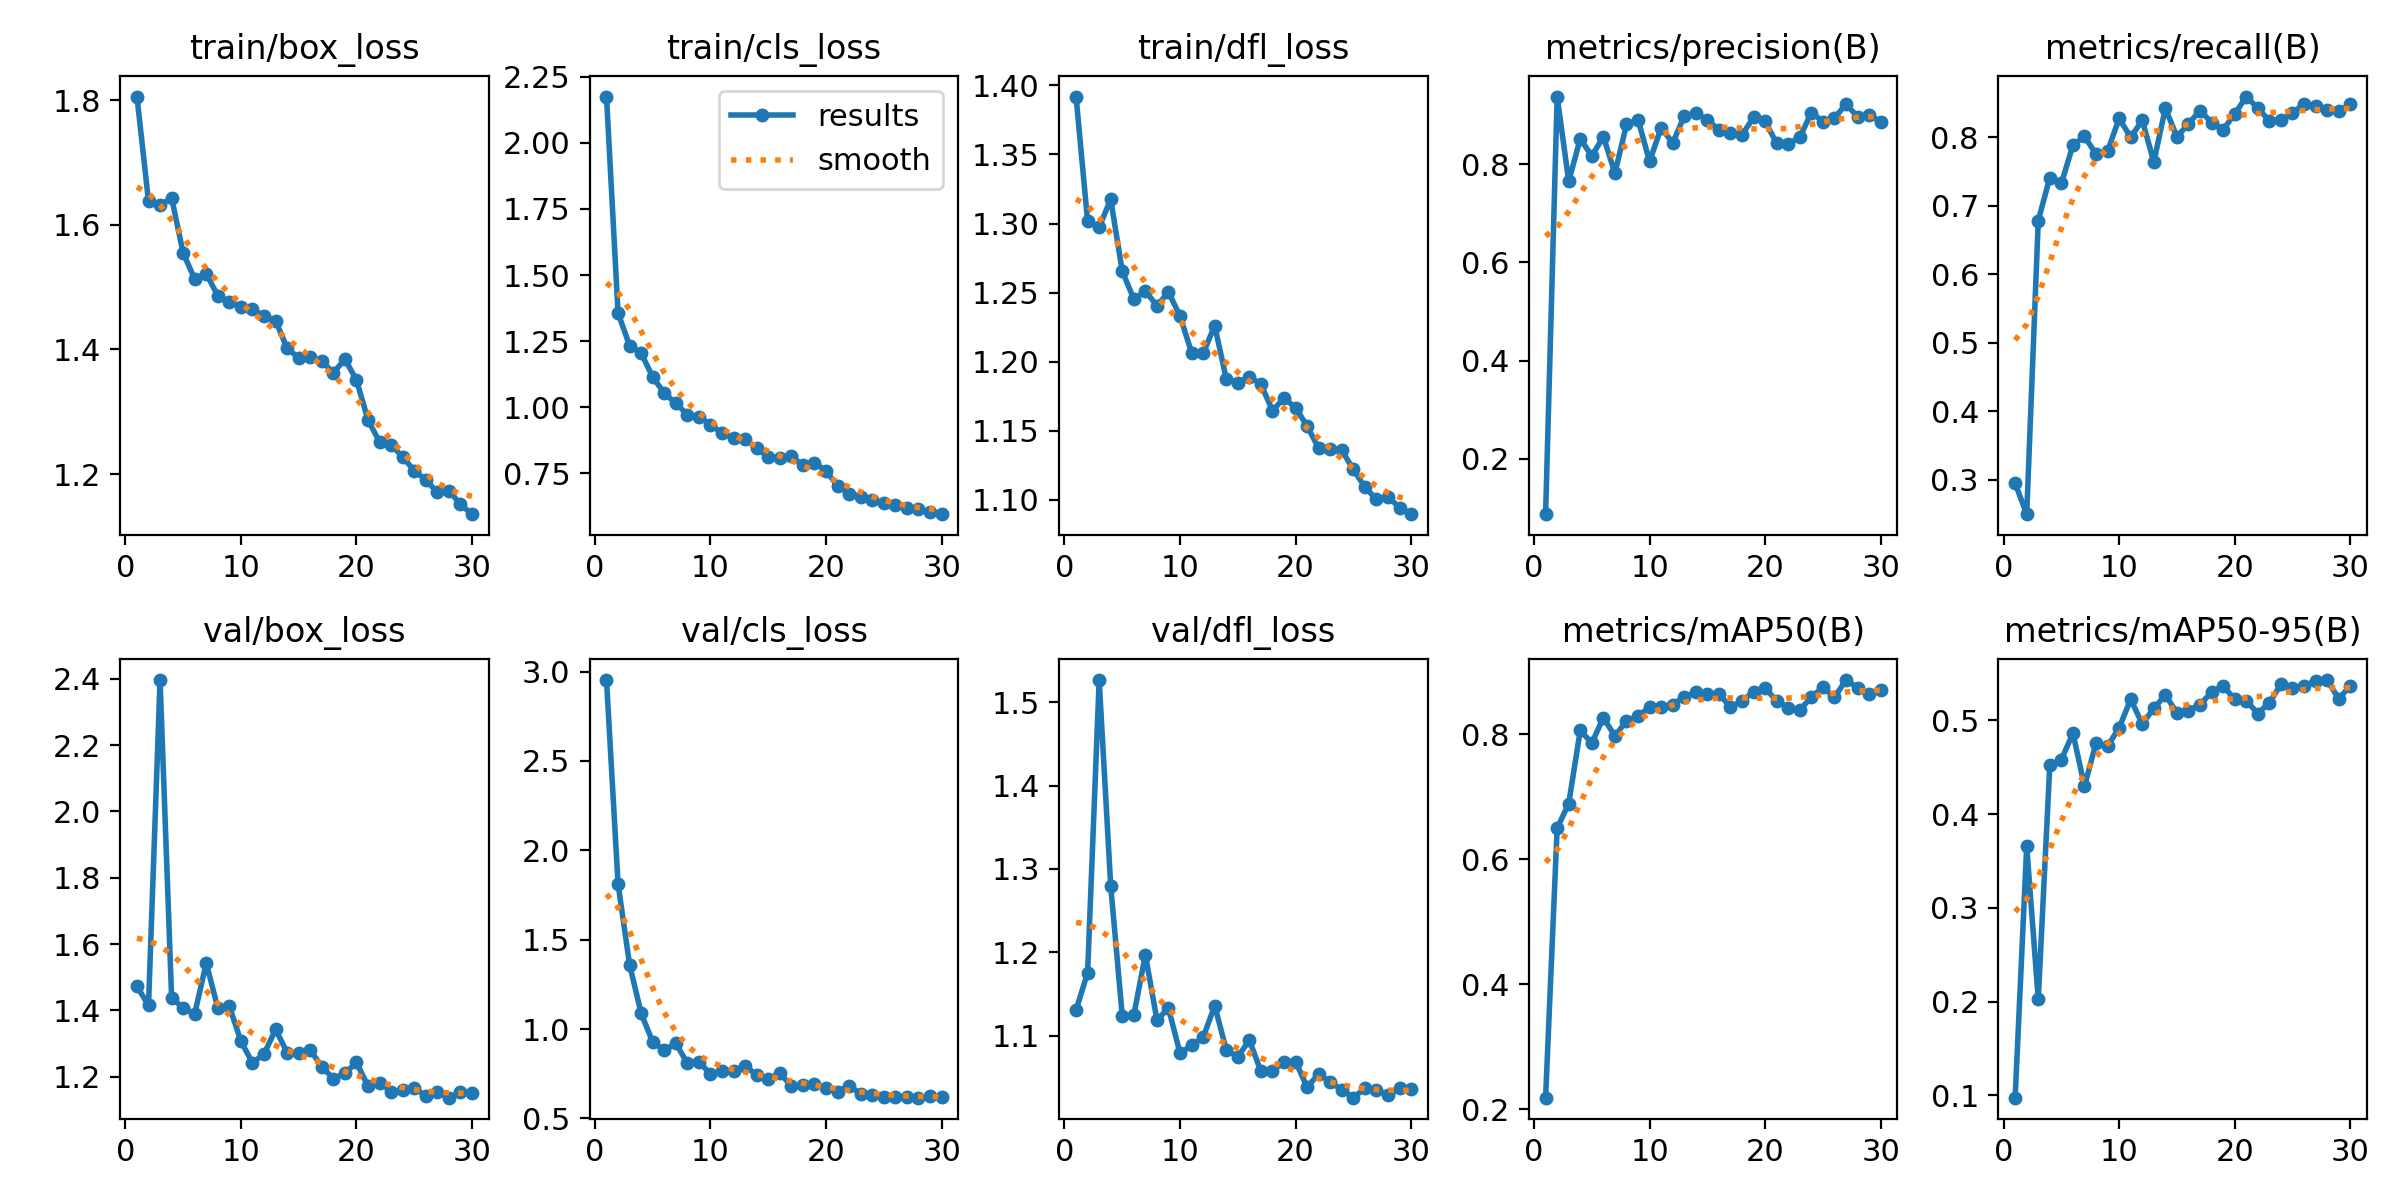

✅ 找到最新的已儲存模型: /content/gdrive/MyDrive/individual_project/proj/basketball_yolov8/saved_models/yolov8_best_20250312-235510.pt


In [1]:
# ✅ 掛載 Google Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

import os
import subprocess
import torch
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ✅ 設定 Google Drive 存放路徑
project_dir = "/content/gdrive/MyDrive/individual_project/proj/basketball_yolov8"
data_yaml = f"{project_dir}/data.yaml"
test_images = f"{project_dir}/test/images"
results_dir = f"{project_dir}/results"
train_dir = f"{project_dir}/runs/train"
saved_models_dir = f"{project_dir}/saved_models"
os.makedirs(train_dir, exist_ok=True)


from IPython.display import Image, display

# ✅ 找到最新的 `exp` 訓練結果資料夾
exp_folders = sorted(glob.glob(f"{train_dir}/exp*"), key=os.path.getmtime, reverse=True)
if not exp_folders:
    print("⚠️ `runs/train/` 內沒有找到 `exp` 目錄，請確認訓練過程是否完成！")
    exit()
latest_exp_folder = exp_folders[0]
print(f"✅ 找到最新的訓練結果：{latest_exp_folder}")

# ✅ 讀取 `results.csv`（監測 mAP、Precision、Recall）
results_csv_path = f"{latest_exp_folder}/results.csv"
if os.path.exists(results_csv_path):
    df = pd.read_csv(results_csv_path)

    # ✅ 取得最後一個 Epoch 訓練指標
    last_epoch = df.iloc[-1]
    print(f"🔹 最後一個 Epoch({int(last_epoch['epoch'])}) 訓練指標:")
    print(f"   - mAP@0.5: {last_epoch['metrics/mAP50(B)']:.4f}")
    print(f"   - Precision: {last_epoch['metrics/precision(B)']:.4f}")
    print(f"   - Recall: {last_epoch['metrics/recall(B)']:.4f}")
else:
    print("⚠️ 找不到 `results.csv`，請確認 YOLOv8 訓練過程是否完成！")

# ✅ 讀取並顯示 YOLOv8 產生的混淆矩陣（Confusion Matrix）
conf_matrix_path = f"{latest_exp_folder}/confusion_matrix.png"
if os.path.exists(conf_matrix_path):
    print("✅ 讀取混淆矩陣：")
    display(Image(filename=conf_matrix_path))
else:
    print("⚠️ 找不到 `confusion_matrix.png`，請確認 YOLOv8 訓練過程是否完成！")

# ✅ 讀取並顯示 YOLOv8 訓練曲線（Loss、mAP、Precision、Recall）
train_curve_path = f"{latest_exp_folder}/results.png"
if os.path.exists(train_curve_path):
    print("✅ 讀取訓練曲線：")
    display(Image(filename=train_curve_path))
else:
    print("⚠️ 找不到 `results.png`，請確認 YOLOv8 訓練過程是否完成！")

# ✅ 找到最新的已儲存模型
saved_models = sorted(glob.glob(f"{saved_models_dir}/yolov8_best_*.pt"), key=os.path.getmtime, reverse=True)
if not saved_models:
    print("⚠️ 沒有找到已儲存的模型，請確認是否有訓練並儲存模型！")
    exit()
latest_model_path = saved_models[0]
print(f"✅ 找到最新的已儲存模型: {latest_model_path}")


✅ 環境變數: C.UTF-8

image 1/32 /content/gdrive/MyDrive/individual_project/proj/basketball_yolov8/test/images/frame_0095_jpg.rf.99c57ac4b1d6630040ef5ff359d13f0d.jpg: 640x640 1 hoop, 6 players, 7.5ms
image 2/32 /content/gdrive/MyDrive/individual_project/proj/basketball_yolov8/test/images/frame_0136_jpg.rf.6ee495811000d24467ac6a6d08a77491.jpg: 640x640 1 hoop, 6 players, 7.4ms
image 3/32 /content/gdrive/MyDrive/individual_project/proj/basketball_yolov8/test/images/frame_0137_jpg.rf.c41db2e7d4ffe67a85b46914d1d299f1.jpg: 640x640 1 hoop, 6 players, 7.5ms
image 4/32 /content/gdrive/MyDrive/individual_project/proj/basketball_yolov8/test/images/frame_0138_jpg.rf.76dec32bbae2e0a94001c7ad25f993e0.jpg: 640x640 1 ball, 1 hoop, 6 players, 7.4ms
image 5/32 /content/gdrive/MyDrive/individual_project/proj/basketball_yolov8/test/images/frame_0139_jpg.rf.58bffb7e563a9a1cc4452c0cfd97ff2b.jpg: 640x640 2 balls, 1 hoop, 8 players, 7.5ms
image 6/32 /content/gdrive/MyDrive/individual_project/proj/basketball_yolov8

100%|██████████| 755k/755k [00:00<00:00, 96.5MB/s]
val: Scanning /content/gdrive/MyDrive/individual_project/proj/basketball_yolov8/valid/labels.cache... 64 images, 0 backgrounds, 0 corrupt: 100%|██████████| 64/64 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:29<00:00,  7.29s/it]


                   all         64        501      0.919      0.849      0.888      0.543
                  ball         48         48       0.88       0.61      0.711      0.292
                  hoop         64         64      0.997          1      0.995      0.696
                player         64        389       0.88      0.936      0.957       0.64
Speed: 8.4ms preprocess, 5.0ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x788adc0b5a90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.

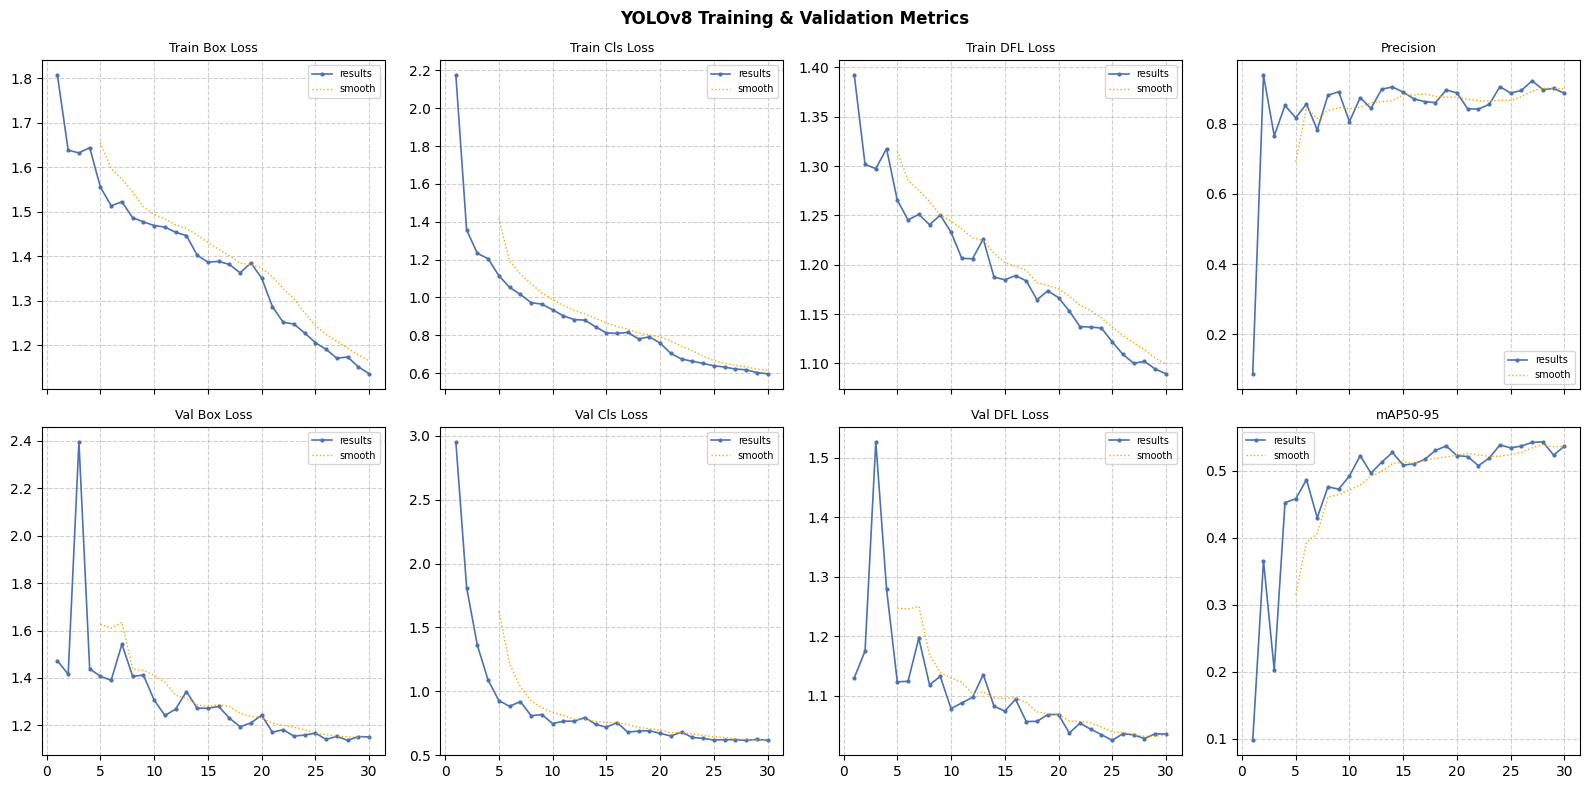

In [2]:
# ✅ 載入已儲存的 YOLOv8 模型
# ✅ **解決 `ANSI_X3.4-1968` 問題，確保 UTF-8**
#  Move these lines before the pip install command
os.environ["LANG"] = "C.UTF-8"
os.environ["LC_ALL"] = "C.UTF-8"
os.environ["PYTHONIOENCODING"] = "UTF-8"
print("✅ 環境變數:", os.popen("echo $LANG").read().strip())  # **檢查是否正確設定**

# ✅ **使用 `subprocess` 避免 `NotImplementedError`**
# Use subprocess.run to install ultralytics
subprocess.run(["pip", "install", "--upgrade", "ultralytics"], check=True)

from ultralytics import YOLO
model = YOLO(latest_model_path)

results = model.predict(
    source=test_images,
    save=True,
    project=results_dir,
    name="yolo_predictions",
)

# ✅ 顯示預測圖片
for image_path in glob.glob(f"{results_dir}/yolo_predictions/*.jpg"):
    display(Image(filename=image_path))

# ✅ 計算 YOLOv8 的 mAP（Mean Average Precision）及其他指標
metrics = model.val()
print(metrics)  # 確保 metrics 有值
print(type(metrics))

# ✅ 繪製 Loss、mAP、Precision、Recall 曲線（優化顯示效果）
if os.path.exists(results_csv_path):
    df = pd.read_csv(results_csv_path)

    # ✅ 設定圖表大小
    fig, axes = plt.subplots(2, 4, figsize=(16, 8), sharex=True, sharey=False)

    # ✅ 定義要繪製的指標
    metrics_list = [
        ("train/box_loss", "Train Box Loss"),
        ("train/cls_loss", "Train Cls Loss"),
        ("train/dfl_loss", "Train DFL Loss"),
        ("metrics/precision(B)", "Precision"),
        ("val/box_loss", "Val Box Loss"),
        ("val/cls_loss", "Val Cls Loss"),
        ("val/dfl_loss", "Val DFL Loss"),
        ("metrics/mAP50-95(B)", "mAP50-95"),
    ]

    # ✅ 逐一繪製每個子圖
    for ax, (metric, title) in zip(axes.flat, metrics_list):
        if metric in df.columns:
            ax.plot(df["epoch"], df[metric], label="results", color="b", marker="o", markersize=2, linewidth=1.2)
            ax.plot(df["epoch"], df[metric].rolling(5).mean(), label="smooth", linestyle="dotted", color="orange", linewidth=1)
            ax.set_title(title, fontsize=9)
            ax.grid(True, linestyle="--", alpha=0.6)
            ax.legend(fontsize=7)

    # ✅ **增加子圖間距，避免擠在一起**
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.suptitle("YOLOv8 Training & Validation Metrics", fontsize=12, fontweight="bold")
    fig.tight_layout()
    plt.show()

else:
    print("⚠️ 找不到 `results.csv`，請確認 YOLOv8 訓練過程是否完成！")